## Data Preparation

In [33]:
# import libraries
import pandas as pd
import numpy as np
# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In [34]:
# check data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [35]:
#TotalCharge should be float
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [36]:

import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['TotalCharges'], 
                 color = data['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = data['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

In [37]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
# init setup (PRESS ENTER)
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,session_id,7831
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


## Model Training and Selection

In [39]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8057,0.8461,0.5356,0.6752,0.5965,0.4709,0.4769,0.4270
ada,Ada Boost Classifier,0.8018,0.8454,0.5303,0.6654,0.5887,0.4607,0.4667,0.1660
lr,Logistic Regression,0.8022,0.8414,0.5514,0.6584,0.5992,0.4695,0.4733,0.1030
lda,Linear Discriminant Analysis,0.7949,0.8360,0.5574,0.6372,0.5934,0.4573,0.4599,0.0300
lightgbm,Light Gradient Boosting Machine,0.7941,0.8322,0.5235,0.6449,0.5768,0.4429,0.4478,0.2600
nb,Naive Bayes,0.7444,0.8274,0.7712,0.5170,0.6184,0.4375,0.4580,0.0140
rf,Random Forest Classifier,0.7882,0.8221,0.4888,0.6382,0.5522,0.4171,0.4242,0.3740
et,Extra Trees Classifier,0.7734,0.7950,0.4880,0.5963,0.5352,0.3878,0.3920,0.3820
knn,K Neighbors Classifier,0.7706,0.7570,0.4668,0.5921,0.5213,0.3735,0.3784,0.0610
dt,Decision Tree Classifier,0.7312,0.6648,0.5167,0.4997,0.5077,0.3231,0.3234,0.0250


In [43]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7831, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Hyperparameter Tuning

In [44]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8134,0.8479,0.5606,0.6852,0.6167,0.4950,0.4993
1,0.8073,0.8478,0.4394,0.7342,0.5498,0.4369,0.4602
2,0.7992,0.8326,0.4470,0.6941,0.5438,0.4227,0.4395
3,0.8032,0.8286,0.4848,0.6882,0.5689,0.4463,0.4578
4,0.8012,0.8493,0.5303,0.6604,0.5882,0.4593,0.4641
5,0.8073,0.8545,0.5152,0.6869,0.5887,0.4662,0.4745
6,0.7911,0.8356,0.4962,0.6471,0.5617,0.4277,0.4342
7,0.7992,0.8553,0.4737,0.6848,0.5600,0.4355,0.4479
8,0.7465,0.7870,0.4211,0.5385,0.4726,0.3090,0.3130
9,0.7951,0.8166,0.4586,0.6778,0.5471,0.4210,0.4344


## Model Analysis

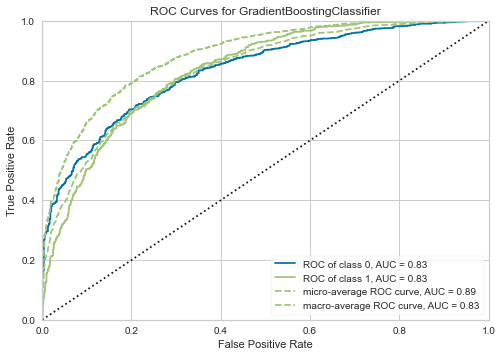

In [45]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

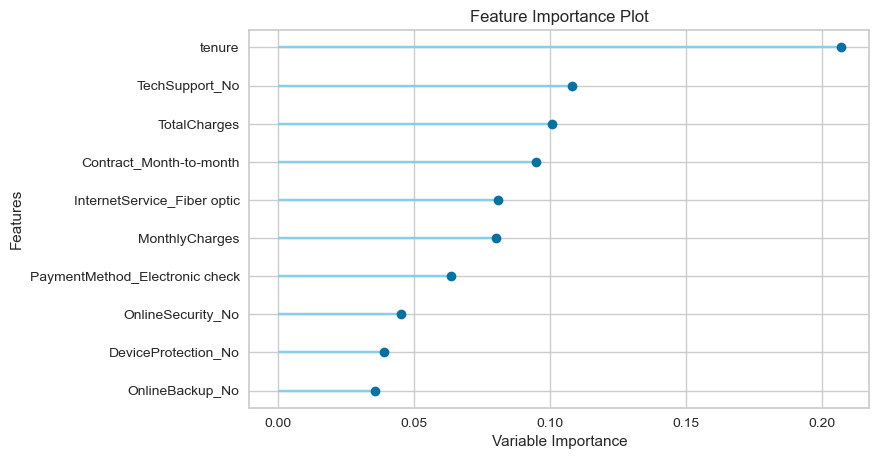

In [46]:
# Feature Importance Plot
plot_model(tuned_gbc, plot = 'feature')

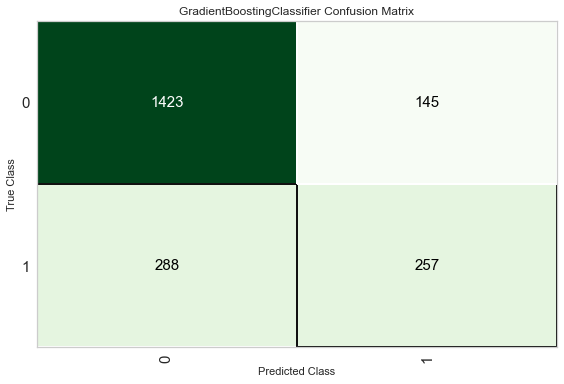

In [47]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

 ## Adding Custom Metric in PyCaret

In [48]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x0000017873307820>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [49]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.7444,0.8274,0.7712,0.5170,0.6184,0.4375,0.4580,312700.0000,0.0140
lr,Logistic Regression,0.8022,0.8414,0.5514,0.6584,0.5992,0.4695,0.4733,253900.0000,0.0910
lda,Linear Discriminant Analysis,0.7949,0.8360,0.5574,0.6372,0.5934,0.4573,0.4599,252700.0000,0.0300
gbc,Gradient Boosting Classifier,0.8057,0.8461,0.5356,0.6752,0.5965,0.4709,0.4769,249300.0000,0.4280
ada,Ada Boost Classifier,0.8018,0.8454,0.5303,0.6654,0.5887,0.4607,0.4667,245300.0000,0.1710
ridge,Ridge Classifier,0.7994,0.0000,0.5189,0.6630,0.5816,0.4523,0.4585,239600.0000,0.0150
lightgbm,Light Gradient Boosting Machine,0.7941,0.8322,0.5235,0.6449,0.5768,0.4429,0.4478,238800.0000,0.0920
rf,Random Forest Classifier,0.7882,0.8221,0.4888,0.6382,0.5522,0.4171,0.4242,222100.0000,0.4030
et,Extra Trees Classifier,0.7734,0.7950,0.4880,0.5963,0.5352,0.3878,0.3920,214500.0000,0.3880
dt,Decision Tree Classifier,0.7312,0.6648,0.5167,0.4997,0.5077,0.3231,0.3234,205100.0000,0.0270


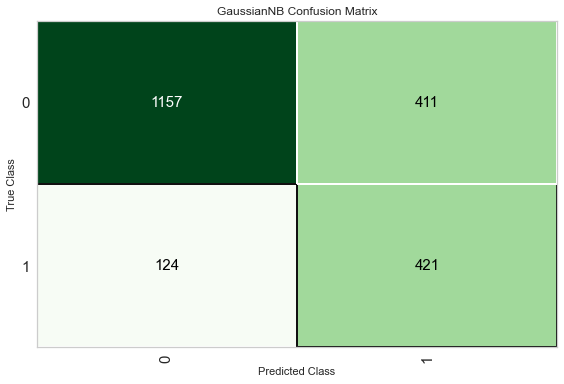

In [50]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')